In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import copy
import matplotlib.pyplot as plt  
import scipy.cluster.hierarchy as shc
%matplotlib inline

In [17]:
COUNTRIES=['Afghanistan','Albania','Algeria','American Samoa','Andorra','Angola','Anguilla','Antarctica','Antigua & Barbuda',
'Argentina','Armenia','Aruba','Australia','Austria','Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium',
'Belize','Benin','Bermuda','Bhutan','Bolivia','Bosnia & Herzegovina','Botswana','Bouvet Island','Brazil','British Indian Ocean Territory',
'British Virgin Islands','Brunei','Bulgaria','Burkina Faso','Burundi','Cambodia','Cameroon','Canada','Cape Verde','Caribbean Netherlands',
'Cayman Islands','Central African Republic','Chad','Chile','China','Christmas Island','Cocos (Keeling) Islands','Colombia','Comoros',
'Congo - Brazzaville','Congo - Kinshasa','Cook Islands','Costa Rica','Croatia','Cuba','Curaçao','Cyprus','Czechia','Côte d’Ivoire',
'Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Ethiopia',
'Falkland Islands (Islas Malvinas)','Faroe Islands','Fiji','Finland','France','French Guiana','French Polynesia','French Southern Territories',
'Gabon','Gambia','Georgia','Germany','Ghana','Gibraltar','Greece','Greenland','Grenada','Guadeloupe','Guam','Guatemala','Guernsey',
'Guinea','Guinea-Bissau','Guyana','Haiti','Heard & McDonald Islands','Honduras','Hong Kong','Hungary','Iceland','India','Indonesia',
'Iran','Iraq','Ireland','Isle of Man','Israel','Italy','Jamaica','Japan','Jersey','Jordan','Kazakhstan','Kenya','Kiribati','Kosovo',
'Kuwait','Kyrgyzstan','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania','Luxembourg','Macau',
'Macedonia (FYROM)','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands','Martinique','Mauritania',
'Mauritius','Mayotte','Mexico','Micronesia','Moldova','Monaco','Mongolia','Montenegro','Montserrat','Morocco','Mozambique',
'Myanmar (Burma)','Namibia','Nauru','Nepal','Netherlands','New Caledonia','New Zealand','Nicaragua','Niger','Nigeria','Niue',
'Norfolk Island','North Korea','Northern Mariana Islands','Norway','Oman','Pakistan','Palau','Palestine','Panama','Papua New Guinea',
'Paraguay','Peru','Philippines','Pitcairn Islands','Poland','Portugal','Puerto Rico','Qatar','Romania','Russia','Rwanda','Réunion',
'Samoa','San Marino','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone','Singapore','Sint Maarten','Slovakia','Slovenia',
'Solomon Islands','Somalia','South Africa','South Georgia & South Sandwich Islands','South Korea','South Sudan','Spain','Sri Lanka',
'St. Barthélemy','St. Helena','St. Kitts & Nevis','St. Lucia','St. Martin','St. Pierre & Miquelon','St. Vincent & Grenadines','Sudan',
'Suriname','Svalbard & Jan Mayen','Swaziland','Sweden','Switzerland','Syria','São Tomé & Príncipe','Taiwan','Tajikistan','Tanzania',
'Thailand','Timor-Leste','Togo','Tokelau','Tonga','Trinidad & Tobago','Tunisia','Turkey','Turkmenistan','Turks & Caicos Islands',
'Tuvalu','U.S. Outlying Islands','U.S. Virgin Islands','Uganda','Ukraine','United Arab Emirates','United Kingdom','United States',
'Uruguay','Uzbekistan','Vanuatu','Vatican City','Venezuela','Vietnam','Wallis & Futuna','Western Sahara','Yemen','Zambia','Zimbabwe',
'Åland Islands']


In [18]:
data_set = pd.read_csv(r'C:\Users\Netta\Google Drive\mahat_project\random_spotify_songs\random_songs_processed_dataset.csv',encoding='utf-8')
data_set_countries_only = data_set[COUNTRIES]
countries_with_labels = data_set_countries_only.transpose()
countries_with_labels.shape

(250, 31682)

in the histogram below we can see the number of countries for each number of nonzero values. a non zero value of one song (for a specific country) means that the number of youtube searches of this song was somehow significanta. we would like to remove countries with very little significant songs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D0ACA325F8>]],
      dtype=object)

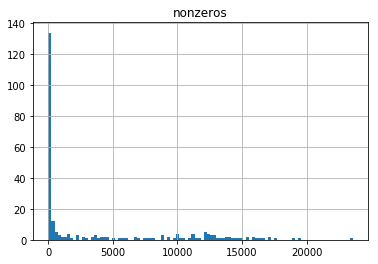

In [19]:
countries_with_labels["nonzeros"] = countries_with_labels.gt(0).sum(axis=1)
countries_with_labels.hist(column='nonzeros',bins=100)

In [20]:
countries_with_labels = countries_with_labels[countries_with_labels.nonzeros>1000]
countries_with_labels.shape

(96, 31683)

we were left with the following countries:

In [21]:
countries_with_labels.index

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia & Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia (FYROM)',
       'Malaysia', 'Mauritius', 'Mexico', 'Morocco', 'Nepal', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Sloven

the dendogram:

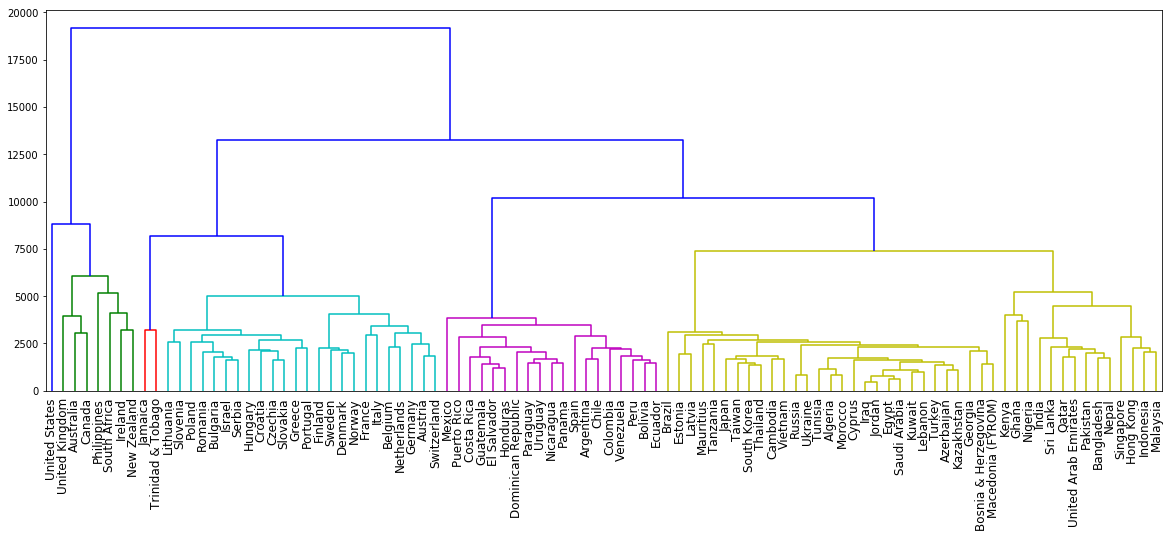

In [34]:
X = copy.deepcopy(countries_with_labels.drop(['nonzeros'], axis=1))
plt.figure(figsize=(20, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'),labels =countries_with_labels.index,leaf_font_size =12,color_threshold = 8000)  

In [30]:
plt.savefig("dendogram.png")

using the dendogram, it's easier to pick the number of clusters:

In [23]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)
countries_with_labels["labels_AgglomerativeClustering"] = cluster.labels_

the clusters we got are:

In [24]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==0].index

Index(['Australia', 'Canada', 'Ireland', 'New Zealand', 'Philippines',
       'South Africa', 'United Kingdom', 'United States'],
      dtype='object')

In [25]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==1].index

Index(['Algeria', 'Azerbaijan', 'Bangladesh', 'Bosnia & Herzegovina', 'Brazil',
       'Cambodia', 'Cyprus', 'Egypt', 'Estonia', 'Georgia', 'Ghana',
       'Hong Kong', 'India', 'Indonesia', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon',
       'Macedonia (FYROM)', 'Malaysia', 'Mauritius', 'Morocco', 'Nepal',
       'Nigeria', 'Pakistan', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore',
       'South Korea', 'Sri Lanka', 'Taiwan', 'Tanzania', 'Thailand', 'Tunisia',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'Vietnam'],
      dtype='object')

In [26]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==2].index

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Israel', 'Italy',
       'Jamaica', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Sweden', 'Switzerland',
       'Trinidad & Tobago'],
      dtype='object')

In [27]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==3].index

Index(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
       'Spain', 'Uruguay', 'Venezuela'],
      dtype='object')